# FDU PRML 2023 Fall Assignment 2.1

Name: 干磊  
<your name>
Student ID: 21307130211
<your student id>

<font color='red'>**Deadline: 2023-11-20 23:59**</font>
<font color='red'>**Overall score weight: 70/100**</font>

In this semester, we are going to complete 3 assignments, each may contain **2-3 parts**. This is the second (and the last) part of the second assignment, in which we will get to implement our own Pytorch-like library.

## 1. FDUNN: your toy torch-like deep learning library (40 points)

In this assignment, you will fist implement your own torch-like deep learning library with `numpy`, named `fdunn`.

PyTorch: [Link](https://pytorch.org/)

In [2]:
# setup code, auto reload your .py file
%load_ext autoreload
%autoreload 2

# numpy
import numpy as np
np.random.seed(233)

# matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

You have to impletement several standard deep neural network modules in the `./fdunn` folder:
1.   linear/conv/pooling
2.   activation
3.   loss
4.   optim
5.   trainer

We have written most of the code for you already, and you only need to fill in the most essential parts. We have also prepared several test cases for you to check if your code works correctly.

Furthermore, you can also test the accuracy of your code by comparing its output with the output of sk-learn.

--------
#### 注：下面会对自己实现的几个模块进行测试
测试方式是：取torch里面对应的模块，然后给同样的输入，检查输出是否相同

-------

### 1.1 test Linear

We'll compare it with torch.nn.Linear

In [3]:
#from fdunn import *
import torch
import torch.nn as nn
from fdunn.modules.linear import Linear

# test Linear
input_dim = 16
output_dim = 32
X = torch.randn(4,input_dim,requires_grad=True)
torch_linear = nn.Linear(input_dim,output_dim)
fdu_linear   = Linear(input_dim,output_dim)

torch_linear.weight.data = torch.Tensor(fdu_linear.params['W'])
torch_linear.bias.data = torch.Tensor(fdu_linear.params['b'])

torch_linear.train()
y_torch = torch_linear(X)
y_fdu   = fdu_linear(X.detach().numpy())

#check output
np.testing.assert_allclose(y_fdu, y_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')


grad_y_torch = torch.ones_like(y_torch)
y_torch.backward(grad_y_torch)
grad_x_fdu = fdu_linear.backward(grad_y_torch.numpy())
grad_w_torch = torch_linear.weight.grad.numpy()
grad_b_torch = torch_linear.bias.grad.numpy()

# check grad
np.testing.assert_allclose(grad_x_fdu, X.grad.detach().numpy(), rtol=1e-5, atol=1e-5)
print('grad_x equal')
np.testing.assert_allclose(fdu_linear.grads['W'], grad_w_torch, rtol=1e-5, atol=1e-5)
print('grad_w equal')
np.testing.assert_allclose(fdu_linear.grads['b'], grad_b_torch, rtol=1e-5, atol=1e-5)
print('grad_b equal')

d:\AelearningFile\InClass\2023Autumn\PRML\Assignment\AS2\2_2
['d:\\AelearningFile\\InClass\\2023Autumn\\PRML\\Assignment\\AS2\\2_2', 'd:\\software\\Conda\\envs\\conflict\\python310.zip', 'd:\\software\\Conda\\envs\\conflict\\DLLs', 'd:\\software\\Conda\\envs\\conflict\\lib', 'd:\\software\\Conda\\envs\\conflict', '', 'd:\\software\\Conda\\envs\\conflict\\lib\\site-packages', 'd:\\software\\Conda\\envs\\conflict\\lib\\site-packages\\win32', 'd:\\software\\Conda\\envs\\conflict\\lib\\site-packages\\win32\\lib', 'd:\\software\\Conda\\envs\\conflict\\lib\\site-packages\\Pythonwin', 'd:\\AelearningFile\\InClass\\2023Autumn\\PRML\\Assignment\\AS2\\2_2', 'd:\\AelearningFile\\InClass\\2023Autumn\\PRML\\Assignment\\AS2\\2_2', 'd:\\AelearningFile\\InClass\\2023Autumn\\PRML\\Assignment\\AS2\\2_2', 'd:\\AelearningFile\\InClass\\2023Autumn\\PRML\\Assignment\\AS2\\2_2']
Output equal
grad_x equal
grad_w equal
grad_b equal


### 1.2 Conv2d Test
compare ours with torch.nn.Conv2d

In [4]:
from fdunn.modules.conv import Conv2d

in_channels = 2
out_channels = 3
kernel_size  = 3

conv_torch = nn.Conv2d(in_channels,out_channels,kernel_size)
conv_fdu = Conv2d(in_channels,out_channels,kernel_size)

conv_torch.weight.data = torch.Tensor(conv_fdu.params['W'])
conv_torch.bias.data = torch.Tensor(conv_fdu.params['b'])


X = torch.randn(4,in_channels,28,28,requires_grad=True)
y_torch = conv_torch(X)
y_fdu = conv_fdu(X.detach().numpy())

#check output
np.testing.assert_allclose(y_fdu, y_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')

#check gradient
grad_y_torch = torch.ones_like(y_torch)
y_torch.backward(grad_y_torch)
grad_x_fdu = conv_fdu.backward(grad_y_torch.numpy())
grad_w_torch = conv_torch.weight.grad.numpy()
grad_b_torch = conv_torch.bias.grad.numpy()

np.testing.assert_allclose(grad_x_fdu, X.grad.detach().numpy(), rtol=1e-5, atol=1e-4)
print('grad_x equal')
np.testing.assert_allclose(conv_fdu.grads['W'], grad_w_torch, rtol=1e-5, atol=1e-4)
print('grad_w equal')

np.testing.assert_allclose(conv_fdu.grads['b'], grad_b_torch, rtol=1e-5, atol=1e-4)
print('grad_b equal')

Output equal
grad_x equal
grad_w equal
grad_b equal


### 1.3 MaxPool2d Test

We'll compare it with torch.nn.MaxPool2d

In [5]:
from fdunn.modules.pooling import MaxPool2d

kernel_size = 2
stride = 2
pool_fdu = MaxPool2d(kernel_size=kernel_size,stride=stride)
pool_torch = torch.nn.MaxPool2d(kernel_size=kernel_size,stride=stride)

X = torch.randn(4,3,28,28,requires_grad=True)
y_torch = pool_torch(X)
y_fdu = pool_fdu(X.detach().numpy())

#check output
np.testing.assert_allclose(y_fdu, y_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')

#check gradient
grad_y_torch = torch.ones_like(y_torch)
y_torch.backward(grad_y_torch)
grad_x_fdu = pool_fdu.backward(grad_y_torch.numpy())

np.testing.assert_allclose(grad_x_fdu, X.grad.detach().numpy(), rtol=1e-5, atol=1e-4)
print('grad_x equal')

Output equal
grad_x equal


### 1.4 Sigmoid Test

compare it with torch.sigmoid()

In [6]:
from fdunn.modules.activation import Sigmoid

sigmoid_fdu = Sigmoid()
X = torch.randn(4,3,28,28,requires_grad=True)
y_torch = torch.sigmoid(X)
y_fdu = sigmoid_fdu(X.detach().numpy())
#check output
np.testing.assert_allclose(y_fdu, y_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')

#check gradient
grad_y_torch = torch.ones_like(y_torch)
y_torch.backward(grad_y_torch)
grad_x_fdu = sigmoid_fdu.backward(grad_y_torch.numpy())

np.testing.assert_allclose(grad_x_fdu, X.grad.detach().numpy(), rtol=1e-5, atol=1e-4)
print('grad_x equal')

Output equal
grad_x equal


### 1.5 Test CrossEntropy

We'll compare it with torch.nn.functional.cross_entropy

In [7]:
from torch.nn.functional import cross_entropy
from fdunn.modules.loss import CrossEntropyLoss

class IdentityModel():
    def __init__(self):
        pass
    def forward(self, input):
        return input

    def backward(self, output_grad):
        return output_grad

y_pred = torch.randn(4,10)
y_true = torch.randn(4,10)
loss_torch = cross_entropy(y_pred,y_true)
CE_fdu     = CrossEntropyLoss(IdentityModel)
loss_fdu   = CE_fdu(y_pred.numpy(),y_true.numpy())

np.testing.assert_allclose(loss_fdu,loss_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')

Output equal


## 2. Deep Learning with Image/Text Data (20 points)

Use your fdunn lib to perform image classification on MNIST or CIFAR10 dataset.

- MNIST: http://yann.lecun.com/exdb/mnist/
- CIFAR10: https://www.cs.toronto.edu/~kriz/cifar.html

In [8]:
#get dataset using torch
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义数据转换，将图像转换为张量并归一化
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch = 16

# 获取MNIST训练数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=False)
train_loader  = DataLoader(train_dataset,batch_size=batch,shuffle=True)
# 获取MNIST测试数据集
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=False)
test_loader   = DataLoader(test_dataset ,batch_size=batch,shuffle=True)



In [26]:
from fdunn.modules.base import Module
from fdunn.modules.activation import ReLU

class Model(Module):
    def __init__(self) -> None:
        self.conv1 = Conv2d(1,6,5)
        self.relu1 = ReLU()
        self.pool1  = MaxPool2d(2,2)
        self.conv2 = Conv2d(6,16,3)
        self.relu2 = ReLU()
        self.pool2  = MaxPool2d(2,2)
        self.fc1   = Linear(16*5*5,120)
        self.relu3 = ReLU()
        self.fc2   = Linear(120,84)
        self.relu4 = ReLU()
        self.fc3   = Linear(84,10)
        self.layers = {
            'conv1':self.conv1,
            'relu1':self.relu1,
            'pool1':self.pool1,
            'conv2':self.conv2,
            'relu2':self.relu2,
            'pool2':self.pool2,
            'fc1':self.fc1,
            'relu3':self.relu3,
            'fc2':self.fc2,
            'relu4':self.relu4,
            'fc3':self.fc3}
        
    def forward(self,x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.reshape(x.shape[0],-1)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
    
        return x
    
    def backward(self, output_grad):
        grad = self.fc3.backward(output_grad)
        grad = self.relu4.backward(grad)
        grad = self.fc2.backward(grad)
        grad = self.relu3.backward(grad)
        grad = self.fc1.backward(grad)
        
        grad = grad.reshape(-1, 16, 5, 5)  # 恢复pooling之前的形状
        
        grad = self.pool2.backward(grad)
        grad = self.relu2.backward(grad)
        grad = self.conv2.backward(grad)
        
        grad = self.pool1.backward(grad)
        grad = self.relu1.backward(grad)
        grad = self.conv1.backward(grad)
        
        return grad

model = Model()

loss_history = []

In [18]:

from fdunn.optim.sgd import SGD
from fdunn.optim.adam import Adam

from fdunn.modules.loss import CrossEntropyLoss

from tqdm import tqdm


optimizer = SGD(model,lr=0.01)
#optimizer = Adam(model,lr=0.01)
loss_fn = CrossEntropyLoss(model)

num_epoch = 0 #50

def one_hot(labels,num_classes):
    one_hot_labels = np.zeros((labels.shape[0], num_classes), dtype=np.float32)
    one_hot_labels[np.arange(labels.shape[0]), labels] = 1

    return one_hot_labels



mode    = 'train'

if len(loss_history)>0:
    # if already trained , print loss_history
    print('loss history:\n',loss_history)
else:
    # train from scratch
    for epoch in range(num_epoch):
        loss_total = 0
        for i_batch,datum in tqdm(enumerate(train_loader),desc=f'epoch{epoch}',total=len(train_loader)):
            X = datum[0].numpy()
            label = datum[1].numpy()
            y = one_hot(label,10)
            y_pred = model(X)
            loss = loss_fn(y_pred,y)
            label_pred = np.argmax(y_pred, 1)
            #print(label_pred == label)
            correct = (label_pred == label).sum()
            #acc_cnt += correct.item()
            loss_total+=loss.item()
            #num_exp += batch        
            if mode =='train':
                loss_fn.backward()
                optimizer.step()
                
        loss_history.append(loss_total)
    


loss history:
 [8638.4501953125, 8581.294921875, 7591.48486328125, 2252.728515625, 1053.446044921875, 752.1578369140625, 605.9782104492188, 517.53955078125, 459.9164123535156, 417.7870788574219, 386.4608459472656, 359.871826171875, 338.58831787109375, 320.2797546386719, 304.1206970214844, 289.1596984863281, 276.3130187988281, 263.42071533203125, 254.5855255126953, 245.12893676757812, 236.19668579101562, 227.7873077392578, 220.13450622558594, 210.99118041992188, 206.568115234375, 200.12147521972656, 194.1234588623047, 188.2694549560547, 183.5987548828125, 177.21812438964844, 173.2720489501953, 168.22998046875, 164.48477172851562, 160.5376739501953, 157.07977294921875, 151.9627227783203, 148.963623046875, 145.983642578125, 141.44326782226562, 138.97506713867188, 136.67054748535156, 132.89529418945312, 130.31771850585938, 127.20108032226562, 124.59286499023438, 120.96067810058594, 119.96495819091797, 117.07197570800781, 113.61637115478516, 111.7655029296875, 110.50514221191406]


#### Accuracy of each class

In [39]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9' )
# Measure accuracy for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

for data in tqdm(test_loader):
    images, labels = data
    outputs = model(images.numpy())
    predictions = np.argmax(outputs, 1)
    # collect the correct predictions for each class
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

# Print accuracy statistics
average_accuray = []
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    average_accuray.append(accuracy)
    print(f'Accuracy for {classname:5s} is {accuracy:.1f} %')
print (f'Average Acc: {np.mean(average_accuray):.1f}')

100%|██████████| 625/625 [12:17<00:00,  1.18s/it]

Accuracy for 0     is 99.8 %
Accuracy for 1     is 99.0 %
Accuracy for 2     is 98.5 %
Accuracy for 3     is 99.3 %
Accuracy for 4     is 98.9 %
Accuracy for 5     is 98.9 %
Accuracy for 6     is 97.4 %
Accuracy for 7     is 99.3 %
Accuracy for 8     is 95.9 %
Accuracy for 9     is 98.0 %
Average Acc: 98.5


## 3. Advanced Topics (10 points)

You can try to implement some advanced topics in deep learning with our fdunn in this section.

We will divide the topics into two categories: modules and optimization, with 5 points for each category.

### 3.1 Modules

Pick one of the following (trending or classic) topics and implement it with fdunn. Try to implement it and design a toy test case to show that your implementation is correct (say we can compare the forward and backward results with the results of corresponding Pytorch modules with the same weight).

- Batch/Layer/Group Normalization (just one of them is fine)
- A ReLU/GeLU/SiLU activation function (just one of them is fine)
- A Gated Linear Unit (GLU)
- An RNN cell
- Or any other modules you are interested in


### 3.2 Optimization

Pick one of the following optimization methods and implement it with fdunn.

- SGD with L2 regularization. (Try to repeat your experiment in Assignment 1.1 to see the same 'underregularization' to 'overregularization' phenomenon)
- Adam (Does it converge faster than SGD in the last section?)
- Or any other optimization methods you are interested in (I am far from an expert in optimization, so maybe you can teach me something new here. Say a second order method?)


If you are not sure about what to do, We suggest you to implement the ReLU activation function and SGD with L2 regularization. They are foundamental and (relatively) easy to implement.

Different methods do not vary in scores. So do not chase fancy methods unless you are quite interested in them.

There are many ways to prove your implementation is correct, as long as they are convincing.

### 3.1 Relu

I choose to implement ReLU as it is really useful 

The definition of class ReLU is in `modules/activation.py`

And I have already used ReLU in the model for MNIST classification task

The following code tests if my ReLU is the same as torch.nn.ReLU

In [155]:
from fdunn.modules.activation import ReLU


ReLU_fdu = ReLU()
ReLU_torch = torch.nn.ReLU()

X = torch.randn(4,32,32,requires_grad=True)
y_torch = ReLU_torch(X)
y_fdu   = ReLU_fdu(X.detach().numpy())

#check output
np.testing.assert_allclose(y_fdu, y_torch.detach().numpy(), rtol=1e-5, atol=1e-5)
print('Output equal')

#check gradient
grad_y_torch = torch.ones_like(y_torch)
y_torch.backward(grad_y_torch)
grad_x_fdu = ReLU_fdu.backward(grad_y_torch.numpy())

np.testing.assert_allclose(grad_x_fdu, X.grad.detach().numpy(), rtol=1e-5, atol=1e-4)
print('grad_x equal')

Output equal
grad_x equal


### 3.2 Adam

Implement our Adam in `fdunn\modules\optim\adam.py`

在上一个section已经有用过Adam进行训练  
下面画出用两种优化器训练时，不同epoch对应的loss曲线。

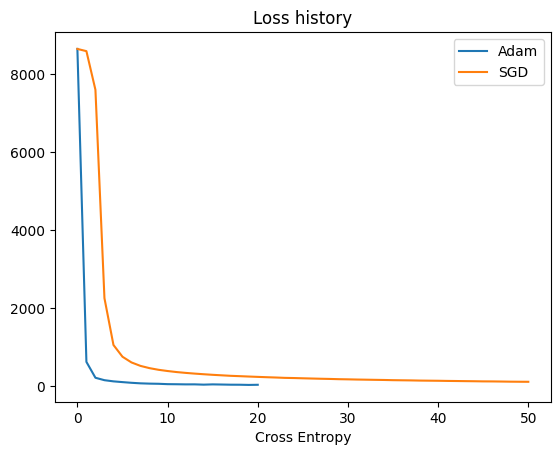

In [183]:

#下面画出用两种方式进行训练，不同epoch时的loss曲线
Adam_loss = [8638.4501953125,620.7177124023438, 213.89102172851562, 151.4208526611328, 121.59040069580078, 102.30972290039062, 84.56820678710938, 70.83726501464844, 63.41128158569336, 59.32310104370117, 49.94365310668945, 47.72056579589844, 44.224159240722656, 44.746707916259766, 37.37348937988281, 44.117801666259766, 40.23704528808594, 36.00308609008789, 35.042484283447266, 30.296903610229492, 33.94499969482422]
SGD_loss = [8638.4501953125,8581.294921875, 7591.48486328125, 2252.728515625, 1053.446044921875, 752.1578369140625, 605.9782104492188, 517.53955078125, 459.9164123535156, 417.7870788574219, 386.4608459472656, 359.871826171875, 338.58831787109375, 320.2797546386719, 304.1206970214844, 289.1596984863281, 276.3130187988281, 263.42071533203125, 254.5855255126953, 245.12893676757812, 236.19668579101562, 227.7873077392578, 220.13450622558594, 210.99118041992188, 206.568115234375, 200.12147521972656, 194.1234588623047, 188.2694549560547, 183.5987548828125, 177.21812438964844, 173.2720489501953, 168.22998046875, 164.48477172851562, 160.5376739501953, 157.07977294921875, 151.9627227783203, 148.963623046875, 145.983642578125, 141.44326782226562, 138.97506713867188, 136.67054748535156, 132.89529418945312, 130.31771850585938, 127.20108032226562, 124.59286499023438, 120.96067810058594, 119.96495819091797, 117.07197570800781, 113.61637115478516, 111.7655029296875, 110.50514221191406]

plt.plot(list(range(len(Adam_loss))),Adam_loss,label='Adam')
plt.plot(list(range(len(SGD_loss))),SGD_loss,label='SGD')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.xlabel('Cross Entropy')
plt.legend()

epoch = 0 时表示初始的模型，没有进行训练  

由图可见，Adam 相较与SGD可以快速地让loss下降  

SGD的loss下降到150左右的时候，loss随epoch的下降变得极其缓慢，限于时间原因，这里没有再继续训练使其降低到100以下  

Adam的loss可以快速下降，只需5轮训练即可降到100以下，20轮即接近收敛。

-------
### 3.3 补充：模型参数的保存和加载

torch里面提供了方便的保存模型参数的方法，我们这里给出类似的保存参数的函数  
要求是 model 的layers是一个字典，保存层的名字和该层模块

提交的文件包含了model_ckpt.npy，所以助教老师可以验证下面代码的有效性和模型的性能

In [32]:
def get_state_dict(model):
    state_dict = {}
    for name, layer in model.layers.items():
        if hasattr(layer, 'params'):
            state_dict[name + '.weight'] = layer.params['W']
            state_dict[name + '.bias'] = layer.params['b']
    return state_dict


def load_state_dict(state_dict_path, model):
    state_dict = np.load(state_dict_path, allow_pickle=True).item()
    for name, layer in model.layers.items():
        if hasattr(layer, 'params'):
            layer.params['W'] = state_dict[name + '.weight']
            layer.params['b'] = state_dict[name + '.bias']
            

#保存checkpoint            
saved_state_dict = get_state_dict(model)
np.save('model_ckpt.npy', saved_state_dict)

In [38]:
#新建一个未训练的模型，并加载训练好的参数
new_model = Model()
load_state_dict('./model_ckpt.npy',new_model)


#直接在100个样本上做推理
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9' )
# Measure accuracy for each class

cnt = 0
correct_count = 0
for data in tqdm(test_loader):
    if (cnt>100):
        break
    cnt += batch
    images, labels = data
    labels = labels.numpy()
    outputs = new_model(images.numpy())
    predictions = np.argmax(outputs, 1)
    correct_count += (labels == predictions).sum().item()
    # collect the correct predictions for each class

# Print accuracy statistics
print (f'Average Acc: {(correct_count/cnt)*100:.1f}%')

  1%|          | 7/625 [00:08<12:12,  1.19s/it]

Average Acc: 96.4%
